### Experiment 1-6, remove softmax

In [1]:
import random

import keras

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import utils

INPUT_DIRECTORIES=['../../../datasets/testingsets/sarah', 
                   '../../../datasets/testingsets/gilbert',
                   '../../../datasets/testingsets/ryan',]

MODEL='./model.hdf5'

Using TensorFlow backend.


In [2]:
model = keras.models.load_model(MODEL)

Code for plotting the false positives and false negatives

In [3]:
NUM_ROWS = 3
NUM_COLS = 6
NUM_SHOWN = NUM_ROWS * NUM_COLS
OUTPUT_SIZE = 128

def plot_one(image, truth, prediction, display_number):
    """
    Plot one image with the truth and prediction printed along the bottom 
    """
    plt.subplot(NUM_ROWS, NUM_COLS, display_number)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    
    # turn off the ticks along the left and bottom of the image
    plt.tick_params(
    axis='both',       # changes apply to both-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,        # left ticks are off
    labelleft=False,   # turn off the left tick labels
    labelbottom=False,) # labels along the bottom edge are off
    
    plt.xlabel(f'truth={truth}\npred ={prediction}')
    
    
def show_results(results, title):
    plt.figure(figsize=(20,10))
    plt.suptitle(title)
    random.shuffle(results);

    for i, (image, truth, prediction) in enumerate(results[:NUM_SHOWN]):
        # the images are normalized and in 3 channels (128,128,1), so they need to be
        # resized to (128,128) and rescaled to [0,255]
        plot_one(image.reshape((OUTPUT_SIZE,OUTPUT_SIZE))*255, np.argmax(truth), np.argmax(prediction), i + 1)
        
    plt.show()

Code for testing a dataset

In [4]:
BATCH_SIZE = 16

IMAGE_FILE_TYPE = '.png'
GROUND_TRUTH_FILENAME ='truth.csv'

def split_results(results):
    """
    Split out the false positives and false negatives from the results. 
    """
    false_positives = [ (image, truth, prediction) for (image, truth, prediction) in results 
                       if np.argmax(truth) == 0 and np.argmax(prediction) == 1]
    false_negatives = [ (image, truth, prediction) for (image, truth, prediction) in results 
                       if np.argmax(truth) == 1 and np.argmax(prediction) == 0]
    
    print(f'false_positives: {len(false_positives)}\nfalse_negatives: {len(false_negatives)}')
    return false_positives, false_negatives


def test_model(model, images, truth):
    evaluate = model.evaluate(images, truth, batch_size=BATCH_SIZE)
    print(f'{evaluate}')
    predictions = model.predict(images, batch_size=BATCH_SIZE)
    return predictions

def test_dataset(dataset):
    """
    Test the model (loaded above) on a given dataset
    """
    images = utils.get_input_images(dataset, IMAGE_FILE_TYPE)
    truth = utils.load_ground_truth(dataset, GROUND_TRUTH_FILENAME)

    predictions = test_model(model, images, truth)
    false_positives, false_negatives = split_results(list(zip(images, truth, predictions)))
    show_results(false_positives, 'false positives (truth==0 and prediction==1)')
    show_results(false_negatives, 'false negatives (truth==1 and prediction==0)')

**Test Sarah**

361/361 [==============================] - 3s 9ms/step
[0.2678740844336903, 0.2678741216659546, 0.867035984992981]
false_positives: 0
false_negatives: 48


<Figure size 1440x720 with 0 Axes>

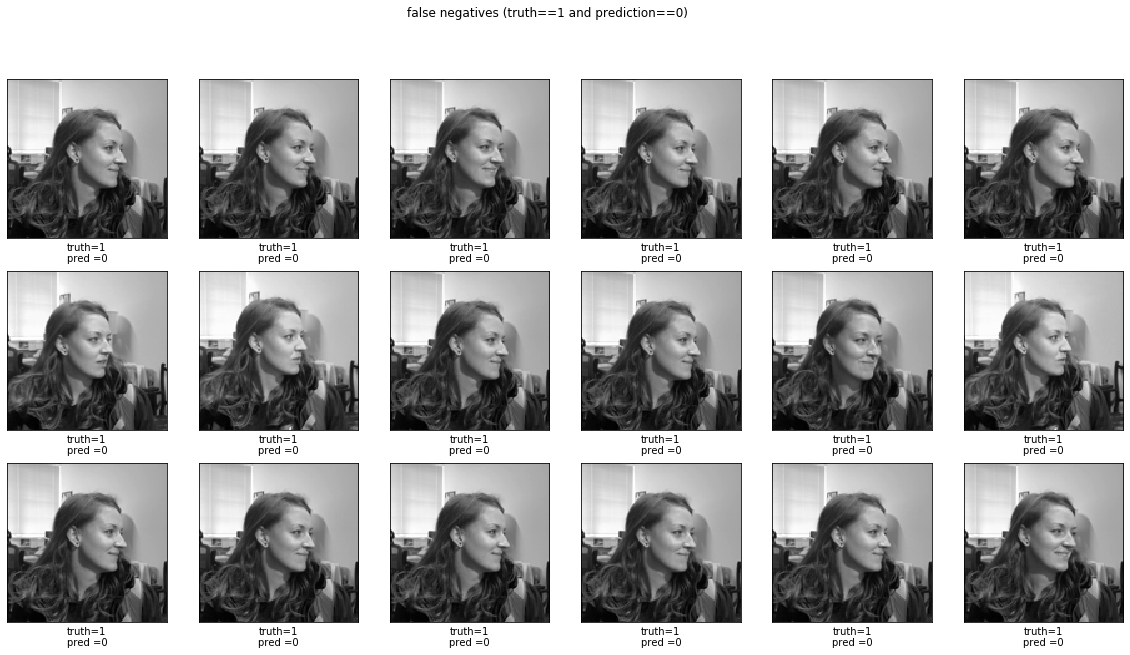

In [5]:
test_dataset(INPUT_DIRECTORIES[0])

**Test Gilbert**

375/375 [==============================] - 3s 7ms/step
[0.39625624879201254, 0.3962562382221222, 0.8666666746139526]
false_positives: 0
false_negatives: 50


<Figure size 1440x720 with 0 Axes>

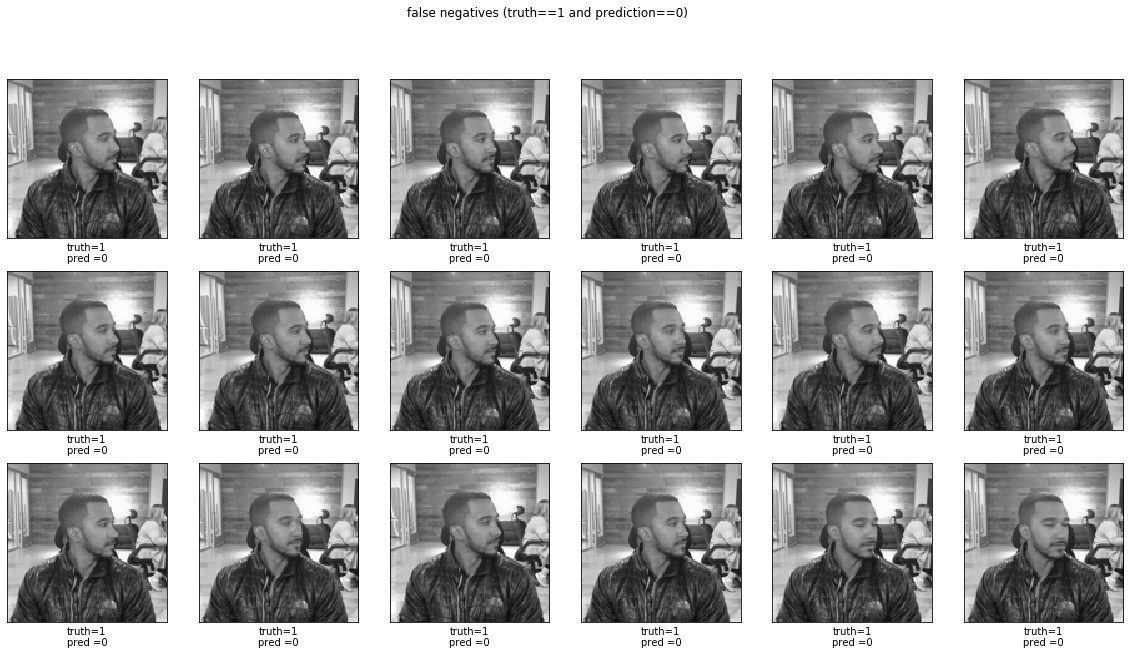

In [6]:
test_dataset(INPUT_DIRECTORIES[1])

**Test Ryan**

559/559 [==============================] - 4s 8ms/step
[0.14430422453819533, 0.14430423080921173, 0.8729874491691589]
false_positives: 0
false_negatives: 71


<Figure size 1440x720 with 0 Axes>

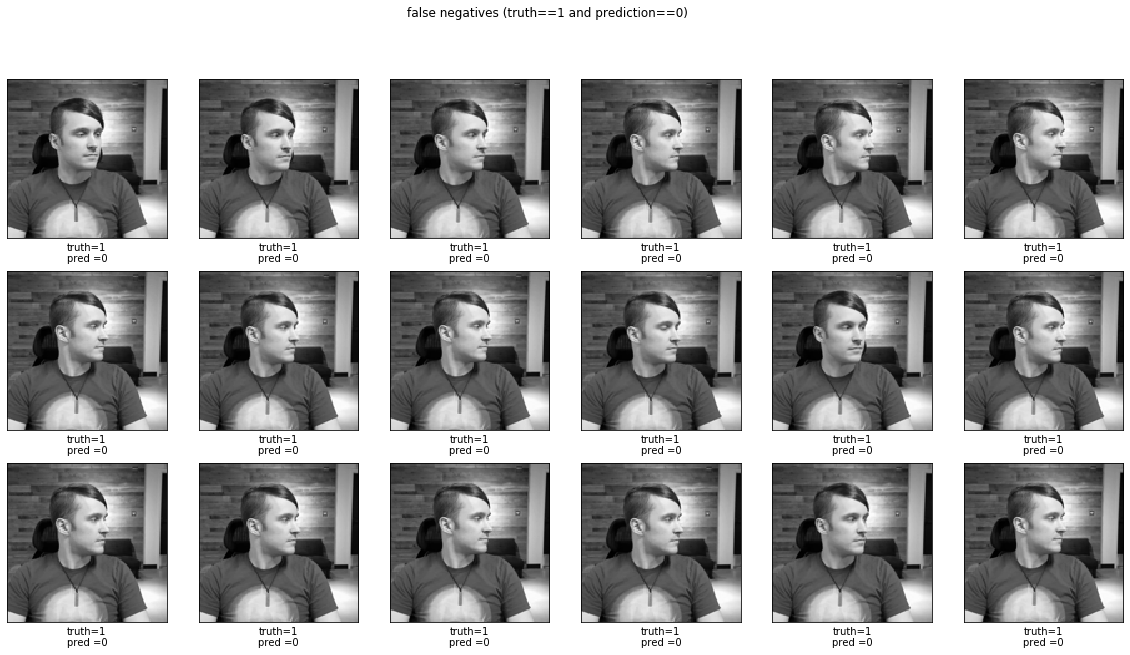

In [7]:
test_dataset(INPUT_DIRECTORIES[2])